## Analyse multivariée : 

In [ ]:
Une fois les éléments mis en place on peut vouloir comparer des éléments entre eux.

In [245]:
df.groupby("Installs").agg("sum")[["Price"]]

,Price
Installs,
1+,2.48
"1,000+",2289.31
"1,000,000+",47.32
"1,000,000,000+",0.00
10+,102.37
"10,000+",2332.17
"10,000,000+",0.99
100+,650.79
"100,000+",689.79


In [246]:
print(len(df.Installs.value_counts().index))

19


In [247]:
df_installs = df[["Installs","Price","Size","Rating"]]
df_installs

,Installs,Price,Size,Rating
0,"10,000+",0.0,19000000.0,4.1
1,"500,000+",0.0,14000000.0,3.9
2,"5,000,000+",0.0,8700000.0,4.7
3,"50,000,000+",0.0,25000000.0,4.5
4,"100,000+",0.0,2800000.0,4.3
...,...,...,...,...
8425,"1,000+",0.0,619000.0,4.8
8426,500+,0.0,2600000.0,4.0
8428,"5,000+",0.0,53000000.0,4.5
8429,100+,0.0,3600000.0,5.0


In [248]:
df_installs["value_installs"] = df_installs["Installs"].apply(lambda x: str(x).replace("+",""))
df_installs["value_installs"] = df_installs["value_installs"].apply(lambda x: int(x.replace(",","")))
df_installs["value_installs"] = df_installs["value_installs"].apply(lambda x: np.log10(x))
df_installs["value_installs"]

c:\cours_python\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\cours_python\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\cours_python\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

0       4.00000
1       5.69897
2       6.69897
3       7.69897
4       5.00000
         ...   
8425    3.00000
8426    2.69897
8428    3.69897
8429    2.00000
8431    7.00000
Name: value_installs, Length: 7027, dtype: float64

In [249]:
df_installs = df_installs.sort_values(by = ['value_installs'])
df_installs

,Installs,Price,Size,Rating,value_installs
3999,1+,1.49,20000000.0,5.0,0.00000
8300,1+,0.99,16000000.0,5.0,0.00000
1546,1+,0.00,25000000.0,5.0,0.00000
6026,5+,0.00,1400000.0,5.0,0.69897
6976,5+,0.00,4300000.0,5.0,0.69897
...,...,...,...,...,...
1048,"500,000,000+",0.00,62000000.0,4.3,8.69897
1049,"500,000,000+",0.00,24000000.0,4.3,8.69897
260,"500,000,000+",0.00,40000000.0,4.5,8.69897
2258,"1,000,000,000+",0.00,13000000.0,3.9,9.00000


In [250]:
df_installs.value_installs.describe()

count    7027.000000
mean        4.910461
std         1.557869
min         0.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: value_installs, dtype: float64

In [251]:
df_installs.Installs.unique()

array(['1+', '5+', '10+', '50+', '100+', '500+', '1,000+', '5,000+',
       '10,000+', '50,000+', '100,000+', '500,000+', '1,000,000+',
       '5,000,000+', '10,000,000+', '50,000,000+', '100,000,000+',
       '500,000,000+', '1,000,000,000+'], dtype=object)

In [252]:
L = list(df_installs.Installs.unique())
L+=["Empty"] #pour avoir 2à valeurs 
L_array  = np.array(L).reshape(5,4)
L_array

array([['1+', '5+', '10+', '50+'],
       ['100+', '500+', '1,000+', '5,000+'],
       ['10,000+', '50,000+', '100,000+', '500,000+'],
       ['1,000,000+', '5,000,000+', '10,000,000+', '50,000,000+'],
       ['100,000,000+', '500,000,000+', '1,000,000,000+', 'Empty']],
      dtype='<U14')

In [253]:
df[(df["Installs"].isin(['0+', '1+', '5+', '10+','50+', '100+', '500+', '1,000+']))]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres
237,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000000.0,"1,000+",0.00,Everyone,Comics
303,Calculator,DATING,2.6,57,6200000.0,"1,000+",6.99,Everyone,Dating
307,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2,17000000.0,100+,7.99,Mature 17+,Dating
387,Transenger – Ts Dating and Chat for Free,DATING,3.6,8,14000000.0,"1,000+",0.00,Mature 17+,Dating
389,Free Cam Girls - Live Webcam,DATING,3.5,35,16000000.0,"1,000+",0.00,Mature 17+,Dating
...,...,...,...,...,...,...,...,...,...
8405,Fr Agnel Pune,FAMILY,4.1,80,13000000.0,"1,000+",0.00,Everyone,Education
8413,Fr. Daoud Lamei,FAMILY,5.0,22,8600000.0,"1,000+",0.00,Teen,Education
8425,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,"1,000+",0.00,Everyone,Books & Reference
8426,FR Calculator,FAMILY,4.0,7,2600000.0,500+,0.00,Everyone,Education


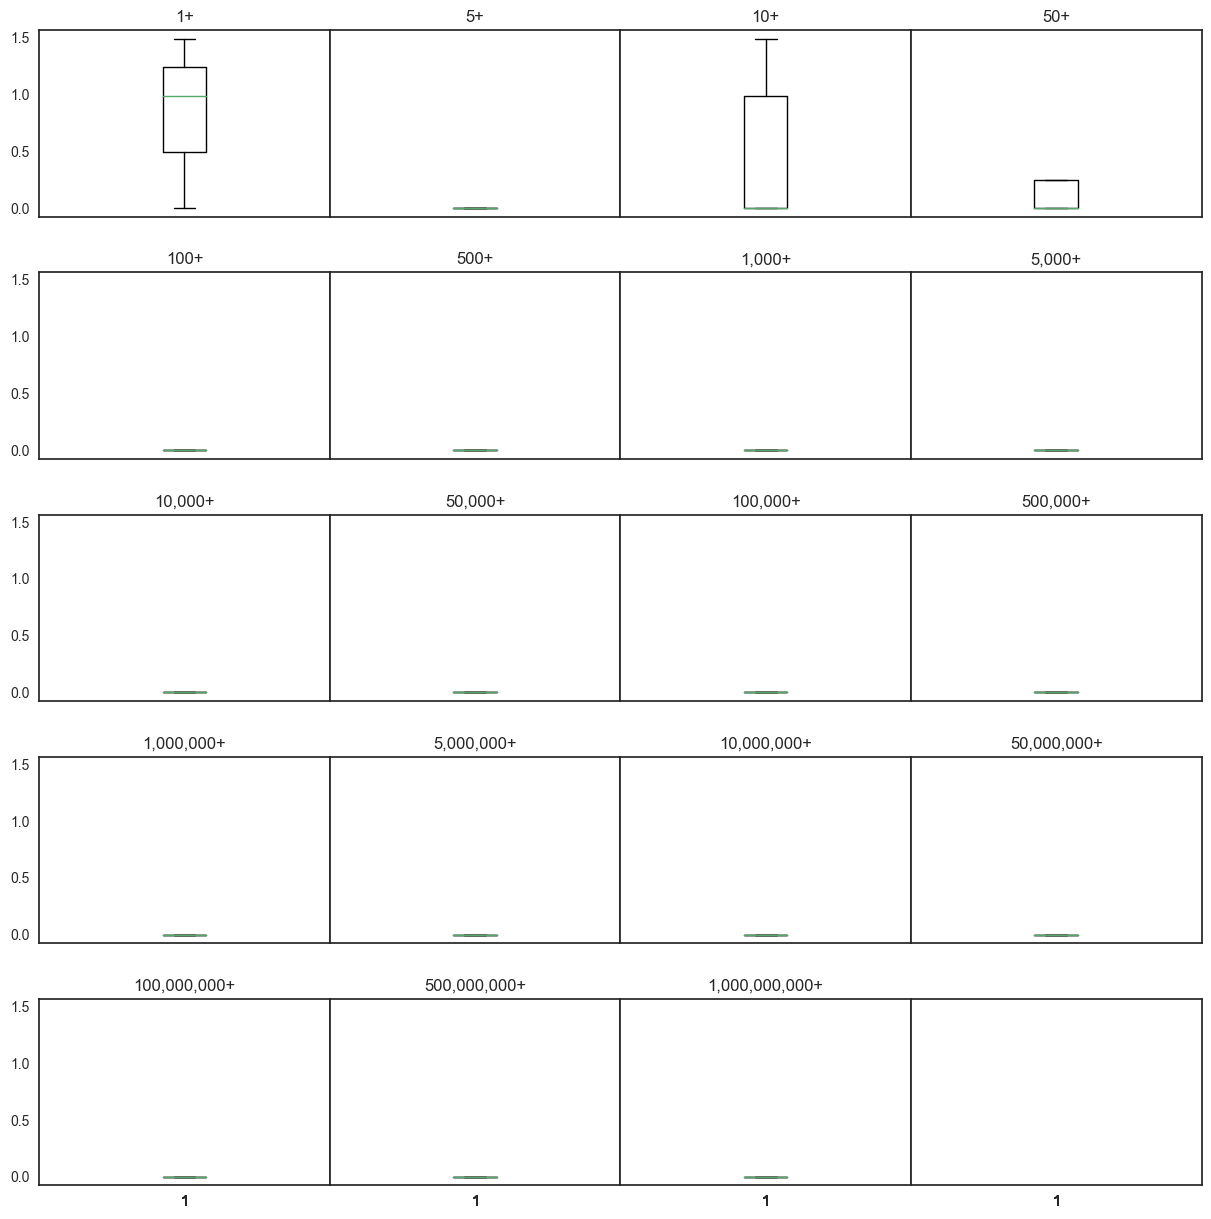

In [254]:
    ##PLOTTING 

    fig,axes = plt.subplots(5,4,sharex = True, sharey = True,figsize=(15,15))
    # Sharex et sharey portent bien leurs noms : si True, ils indiquent que les sous-graphiques
    # ont des axes paramétrés de la même manière
    for i in range(5):
        for j in range(4):
            if (i+1)*(j+1) < 20 : 
                axes[i,j].boxplot(list(df_installs[df_installs['Installs'] == L_array[i,j]]["Price"]), showfliers = False)
            # L'objet "axes" est un 2darray, simple à indicer et parcourir avec une boucle
                axes[i,j].set_title(L_array[i,j])
    # N'hésitez pas à faire varier les paramètres qui vous posent question. Par exemple, à quoi sert alpha ?
    plt.subplots_adjust(wspace=0,hspace=0.3)
    # Cette dernière méthode permet de supprimer les espaces entres les sous graphes.

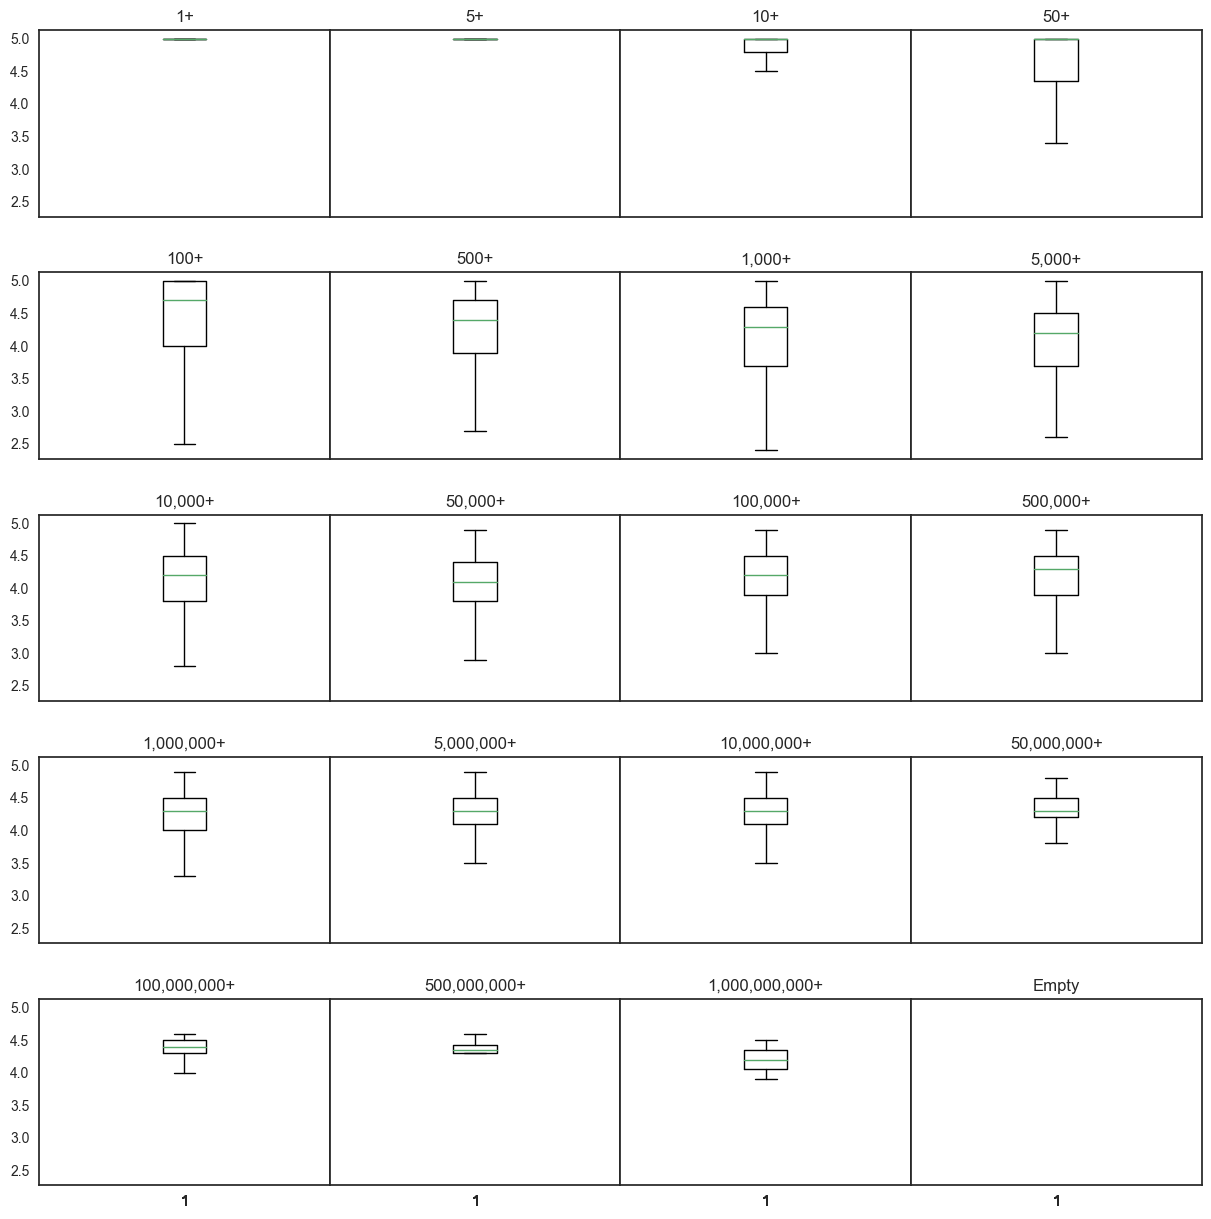

In [255]:
    ##PLOTTING 

    fig,axes = plt.subplots(5,4,sharex = True, sharey = True,figsize=(15,15))
    # Sharex et sharey portent bien leurs noms : si True, ils indiquent que les sous-graphiques
    # ont des axes paramétrés de la même manière
    for i in range(5):
        for j in range(4):
            axes[i,j].boxplot(list(df_installs[df_installs['Installs'] == L_array[i,j]]["Rating"]), showfliers = False)
                        
    # L'objet "axes" est un 2darray, simple à indicer et parcourir avec une boucle
            axes[i,j].set_title(L_array[i,j])
    # N'hésitez pas à faire varier les paramètres qui vous posent question. Par exemple, à quoi sert alpha ?
    plt.subplots_adjust(wspace=0,hspace=0.3)
    # Cette dernière méthode permet de supprimer les espaces entres les sous graphes.

In [256]:
df_installs.value_installs.describe()

count    7027.000000
mean        4.910461
std         1.557869
min         0.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: value_installs, dtype: float64

In [257]:
# A regrouper en bins PLUS lARge : 


labels = ["{0} - {1}".format(i,i+1) for i in range(0, 9, 1)] 
#liste de chaînes de caractères (L =["Inf 9","entre 10 et 19 ",...] fonctionne aussi )

df_installs["bins"] = pd.cut(df_installs[df_installs.value_installs>-np.inf].value_installs,9,labels=labels)

In [258]:
df_installs 

,Installs,Price,Size,Rating,value_installs,bins
3999,1+,1.49,20000000.0,5.0,0.00000,0 - 1
8300,1+,0.99,16000000.0,5.0,0.00000,0 - 1
1546,1+,0.00,25000000.0,5.0,0.00000,0 - 1
6026,5+,0.00,1400000.0,5.0,0.69897,0 - 1
6976,5+,0.00,4300000.0,5.0,0.69897,0 - 1
...,...,...,...,...,...,...
1048,"500,000,000+",0.00,62000000.0,4.3,8.69897,8 - 9
1049,"500,000,000+",0.00,24000000.0,4.3,8.69897,8 - 9
260,"500,000,000+",0.00,40000000.0,4.5,8.69897,8 - 9
2258,"1,000,000,000+",0.00,13000000.0,3.9,9.00000,8 - 9


In [259]:
L_bins = list(df_installs.bins.unique())
L_bins += [None]
L_bins

['0 - 1',
 '1 - 2',
 '2 - 3',
 '3 - 4',
 '4 - 5',
 '5 - 6',
 '6 - 7',
 '7 - 8',
 '8 - 9',
 None]

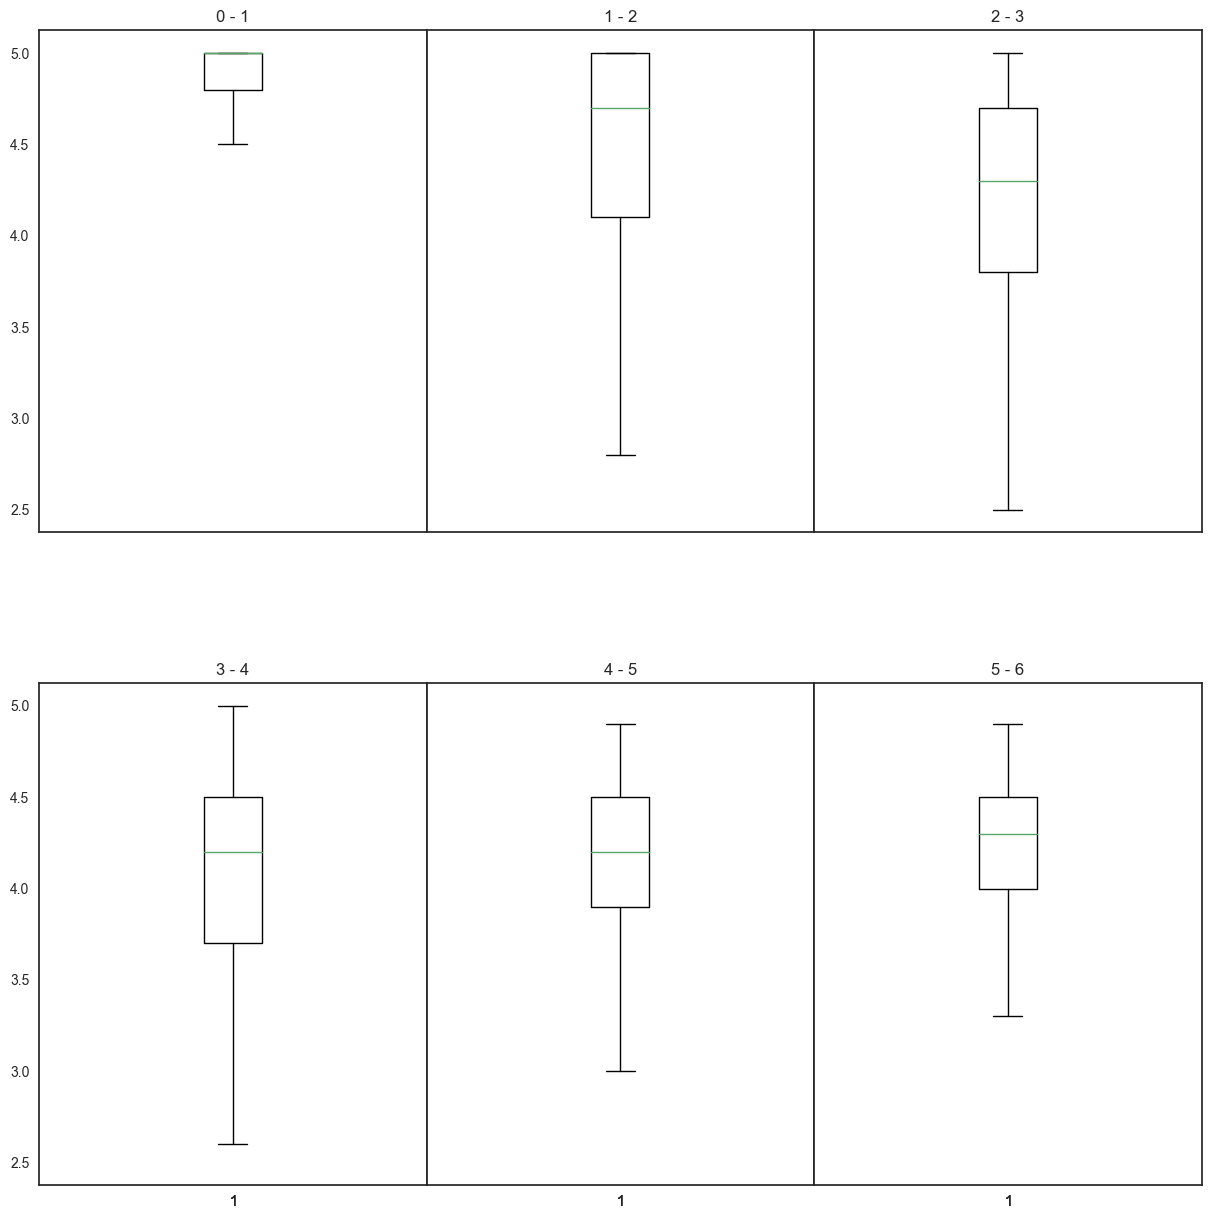

In [267]:
    ##PLOTTING 

    fig,axes = plt.subplots(2,3,sharex = True, sharey = True,figsize=(15,15))
    # Sharex et sharey portent bien leurs noms : si True, ils indiquent que les sous-graphiques
    # ont des axes paramétrés de la même manière
    c = 0
    for i in range(2):
        for j in range(3):
            axes[i,j].boxplot(list(df_installs[df_installs['bins'] == L_bins[c]]["Rating"]), showfliers = False)
                        
    # L'objet "axes" est un 2darray, simple à indicer et parcourir avec une boucle
            axes[i,j].set_title(L_bins[c])
            c+=1
    # N'hésitez pas à faire varier les paramètres qui vous posent question. Par exemple, à quoi sert alpha ?
    plt.subplots_adjust(wspace=0,hspace=0.3)
    # Cette dernière méthode permet de supprimer les espaces entres les sous graphes.

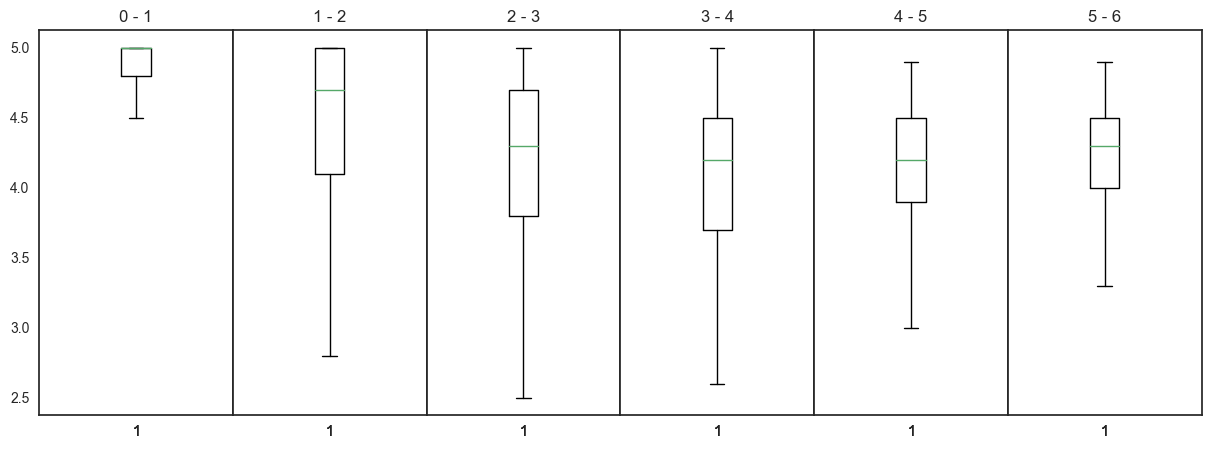

In [270]:
    ##PLOTTING 

    fig,axes = plt.subplots(1,6,sharex = True, sharey = True,figsize=(15,5))
    # Sharex et sharey portent bien leurs noms : si True, ils indiquent que les sous-graphiques
    # ont des axes paramétrés de la même manière
    c = 0
    for i in range(1):
        for j in range(6):
            axes[j].boxplot(list(df_installs[df_installs['bins'] == L_bins[c]]["Rating"]), showfliers = False)
                        
    # L'objet "axes" est un 2darray, simple à indicer et parcourir avec une boucle
            axes[j].set_title(L_bins[c])
            c+=1
    # N'hésitez pas à faire varier les paramètres qui vous posent question. Par exemple, à quoi sert alpha ?
    plt.subplots_adjust(wspace=0,hspace=0.3)
    # Cette dernière méthode permet de supprimer les espaces entres les sous graphes.

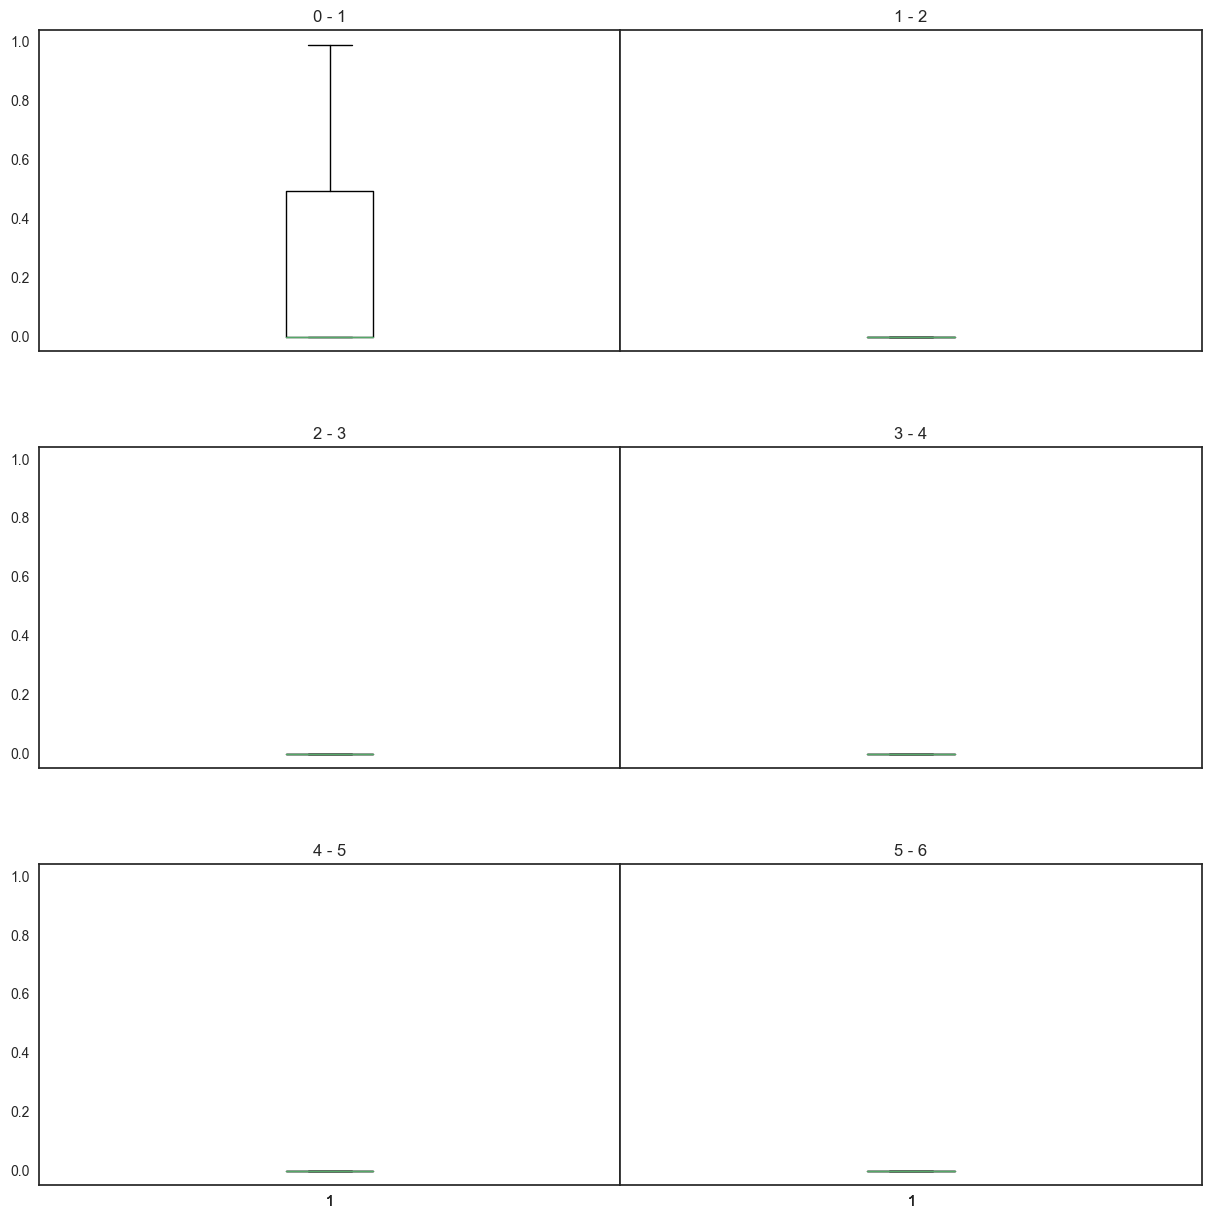

In [261]:
    ##PLOTTING 

    fig,axes = plt.subplots(3,2,sharex = True, sharey = True,figsize=(15,15))
    # Sharex et sharey portent bien leurs noms : si True, ils indiquent que les sous-graphiques
    # ont des axes paramétrés de la même manière
    c = 0
    for i in range(3):
        for j in range(2):
            axes[i,j].boxplot(list(df_installs[df_installs['bins'] == L_bins[c]]["Price"]), showfliers = False)
                        
    # L'objet "axes" est un 2darray, simple à indicer et parcourir avec une boucle
            axes[i,j].set_title(L_bins[c])
            c+=1
    # N'hésitez pas à faire varier les paramètres qui vous posent question. Par exemple, à quoi sert alpha ?
    plt.subplots_adjust(wspace=0,hspace=0.3)
    # Cette dernière méthode permet de supprimer les espaces entres les sous graphes.

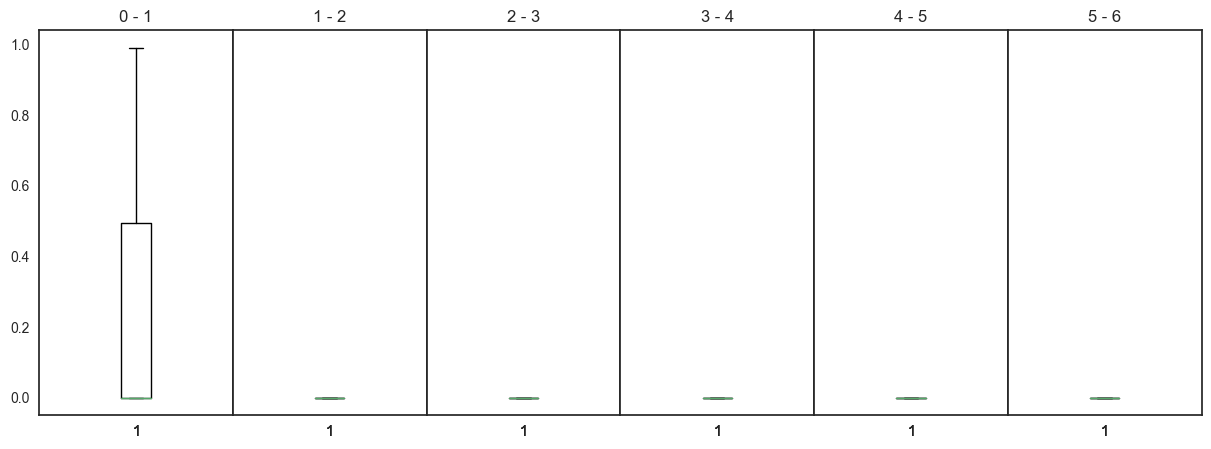

In [271]:
    ##PLOTTING 

    fig,axes = plt.subplots(1,6,sharex = True, sharey = True,figsize=(15,5))
    # Sharex et sharey portent bien leurs noms : si True, ils indiquent que les sous-graphiques
    # ont des axes paramétrés de la même manière
    c = 0
    for i in range(1):
        for j in range(6):
            axes[j].boxplot(list(df_installs[df_installs['bins'] == L_bins[c]]["Price"]), showfliers = False)
                        
    # L'objet "axes" est un 2darray, simple à indicer et parcourir avec une boucle
            axes[j].set_title(L_bins[c])
            c+=1
    # N'hésitez pas à faire varier les paramètres qui vous posent question. Par exemple, à quoi sert alpha ?
    plt.subplots_adjust(wspace=0,hspace=0.3)
    # Cette dernière méthode permet de supprimer les espaces entres les sous graphes.


https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

https://matplotlib.org/stable/api/matplotlib_configuration_api.html

# Exercices 

**J'attends vos retours**

In [219]:
print("Hello world \n Hello world")
print("Hello world \t Hello world")

Hello world 
 Hello world
Hello world 	 Hello world


In [224]:
df.columns
treated = [x.upper() for x in df.columns]

In [231]:
list(zip(df.columns,treated))

[('App', 'APP'),
 ('Category', 'CATEGORY'),
 ('Rating', 'RATING'),
 ('Reviews', 'REVIEWS'),
 ('Size', 'SIZE'),
 ('Installs', 'INSTALLS'),
 ('Price', 'PRICE'),
 ('Content Rating', 'CONTENT RATING'),
 ('Genres', 'GENRES'),
 ('Last Updated', 'LAST UPDATED'),
 ('Current Ver', 'CURRENT VER'),
 ('Android Ver', 'ANDROID VER')]

In [223]:
dicoreplace = {}
for x,y in zip(df.columns,treated):
    dicoreplace[x] = y
dicoreplace

{'App': 'APP',
 'Category': 'CATEGORY',
 'Rating': 'RATING',
 'Reviews': 'REVIEWS',
 'Size': 'SIZE',
 'Installs': 'INSTALLS',
 'Price': 'PRICE',
 'Content Rating': 'CONTENT RATING',
 'Genres': 'GENRES',
 'Last Updated': 'LAST UPDATED',
 'Current Ver': 'CURRENT VER',
 'Android Ver': 'ANDROID VER'}

In [ ]:
dict(zip(df.columns,treated))

In [237]:
df = pd.read_csv(path, delimiter = ",")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [236]:
df = df.drop_duplicates(subset=["App"])
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


{'App': 'APP',
 'Category': 'CATEGORY',
 'Rating': 'RATING',
 'Reviews': 'REVIEWS',
 'Size': 'SIZE',
 'Installs': 'INSTALLS',
 'Price': 'PRICE',
 'Content Rating': 'CONTENT RATING',
 'Genres': 'GENRES',
 'Last Updated': 'LAST UPDATED',
 'Current Ver': 'CURRENT VER',
 'Android Ver': 'ANDROID VER'}

In [226]:
df.rename(columns = dicoreplace)

,APP,CATEGORY,RATING,REVIEWS,SIZE,INSTALLS,PRICE,CONTENT RATING,GENRES,LAST UPDATED,CURRENT VER,ANDROID VER
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
8527,nom_random95,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8528,nom_random96,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8529,nom_random97,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8530,nom_random98,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
Liste_prenom = [" MAJ  "," Nom_Ville "]
data_note = [{" MAJ  " : 1," Nom_Ville ": "Paris"},
             {" MAJ  " : 2," Nom_Ville ": "Marseille"}
            ]
data_ville = pd.DataFrame(data_note)
data_ville

,MAJ,Nom_Ville
0,1,Paris
1,2,Marseille


In [214]:
data_ville.rename(columns = {" MAJ  ": " MAJ  ".strip()})

,MAJ,Nom_Ville
0,1,Paris
1,2,Marseille


Notebook à rendre : Efrei_NomDeFamille1_NomDeFamille2.ipynb

Importer la Base des villes villes.txt

Lire la base de données avec le bon delimiter et afficher les premières lignes

Les noms de variables et les observations contiennent des espaces inutiles (exemple : ‘MAJ’) : commencer par nettoyer l’ensemble des chaines de caractères (à la fois dans les noms de colonnes et dans les observations)

Trouver le nombre de codes INSEE différents (attention aux doublons)

Comment calculer rapidement la moyenne, le nombre et le maximum pour chaque variable numérique ? (une ligne de code)

Compter le nombre de villes dans chaque Region et en faire un dictionnaire où la clé est la région et la valeur le nombre de villes (voir groupby)

--------------------------------------------------------------------------------------------------------


Importer la base de données relatives aux joueurs de la Coupe du Monde 2014 >> Players_WC2014.csv

Déterminer le nombre de joueurs dans chaque équipe et créer un dictionnaire { équipe : Nombre de joueurs}

Déterminer quels sont les 3 joueurs qui ont couvert le plus de distance.  Y a t il un biais de sélection ? 

Parmis les joueurs qui sont dans le premier décile des joueurs plus rapides, qui a passé le plus clair de son temps à courir sans la balle ?

In [5]:
text = " Nom Vile "

In [2]:
" " in text

True

In [10]:
text[0] == " ",text[-1] == " "

(True, True)

In [11]:
text[0] != " ",text[-1] != " "

(False, False)

In [16]:
A

3

https://docs.python.org/3/library/re.html